In [1]:
import pandas as pd
import numpy as np

In [14]:
transaction_history_1 = pd.read_csv("../transaction_history_csv/sep-dec.csv")
transaction_history_2 = pd.read_csv("../transaction_history_csv/jun-sep.csv")
transaction_history = pd.concat([transaction_history_1, transaction_history_2])

# transaction_history = transaction_history[transaction_history["Reference"] == "UMC-S"]
transaction_history["Transaction Date"] = pd.to_datetime(transaction_history["Transaction Date"])
transaction_history["Debit Amount"] = transaction_history["Debit Amount"].replace({' ': np.nan})
transaction_history["Debit Amount"] = transaction_history["Debit Amount"].astype(float)
transaction_history["Date"] = transaction_history["Transaction Date"].dt.strftime('%b %d')
transaction_history["Month"] = transaction_history["Transaction Date"].dt.strftime('%m %b')
transaction_history["Vendor"] = transaction_history["Transaction Ref1"].fillna(transaction_history["Transaction Ref2"])

transaction_history

,Transaction Date,Reference,Debit Amount,Credit Amount,Transaction Ref1,Transaction Ref2,Transaction Ref3,Unnamed: 7,Date,Month,Vendor
0,2024-12-01,UMC-S,41.99,,NaN,COTTON ON SINGAPORE PT SI NG 30NOV,5264-7110-0390-7302,NaN,Dec 01,12 Dec,COTTON ON SINGAPORE PT SI NG 30NOV
1,2024-12-01,UMC-S,16.38,,NaN,BUS/MRT 542846245 SI NG 22NOV,5264-7110-0390-7302,NaN,Dec 01,12 Dec,BUS/MRT 542846245 SI NG 22NOV
2,2024-11-29,UMC-S,22.40,,MCDONALD'S (PS) SI NG 25NOV,5264-7110-0390-7302,NaN,NaN,Nov 29,11 Nov,MCDONALD'S (PS) SI NG 25NOV
3,2024-11-28,UMC-S,22.80,,EAT 3 BOWLS SI NG 26NOV,5264-7110-0390-7302,NaN,NaN,Nov 28,11 Nov,EAT 3 BOWLS SI NG 26NOV
4,2024-11-27,UMC-S,4.60,,MCDONALDS 930201 SI NG 26NOV,5264-7110-0390-7302,NaN,NaN,Nov 27,11 Nov,MCDONALDS 930201 SI NG 26NOV
...,...,...,...,...,...,...,...,...,...,...,...
108,2024-06-13,UMC-S,13.21,,BUS/MRT 449978088 SI NG 04JUN,5264-7110-1009-8095,NaN,NaN,Jun 13,06 Jun,BUS/MRT 449978088 SI NG 04JUN
109,2024-06-09,UMC-S,10.90,,POPEYES - THE SELETAR SI NG 31MAY,5264-7110-1009-8095,NaN,NaN,Jun 09,06 Jun,POPEYES - THE SELETAR SI NG 31MAY
110,2024-06-08,UMC-S,10.80,,BUS/MRT 447292638 SI NG 30MAY,5264-7110-1009-8095,NaN,NaN,Jun 08,06 Jun,BUS/MRT 447292638 SI NG 30MAY
111,2024-06-06,ICT,21.00,,PayNow Transfer 8688249,To: Yuta,OTHR PayNow Transfer,NaN,Jun 06,06 Jun,PayNow Transfer 8688249


<Axes: xlabel='Transaction Date'>

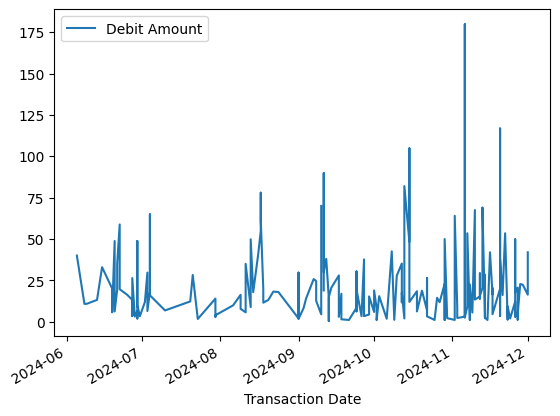

In [13]:
transaction_history[["Transaction Date", "Debit Amount"]].set_index("Transaction Date").plot.line()

In [8]:
transaction_history[transaction_history["Debit Amount"] >= 20][["Date", "Debit Amount", "Vendor"]].to_csv("../transaction_history_csv/out.csv", index=False)

In [16]:
transaction_history[["Date", "Debit Amount", "Vendor"]].to_csv("../transaction_history_csv/out.csv", index=False)

In [7]:
transaction_history[["Month", "Debit Amount"]].groupby("Month").sum().to_csv("../transaction_history_csv/out.csv")

<Axes: xlabel='Month'>

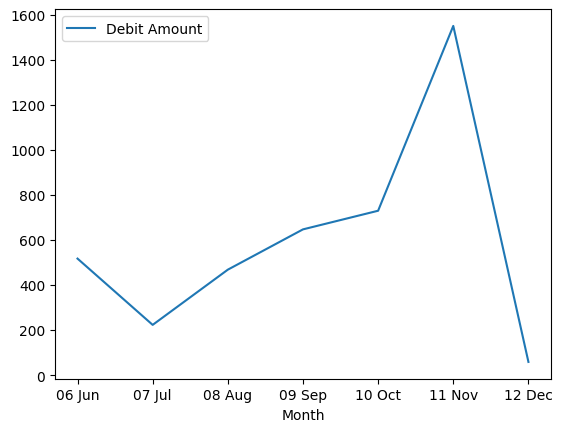

In [6]:
transaction_history[["Month", "Debit Amount"]].groupby("Month").sum().plot()